# Day 1 :Load Data

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [102]:
# Load the dataset
data = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
# Display the first few rows of the dataset
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Day 2: Data Cleaning.
# 1. Data cleaning.

# 1.1 Check for null values in columns in data set.

In [103]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

# 1.2 Handle Missing Values

Decide how to handle missing values. For example, you can drop rows with missing values or fill them with a specific value. If there are only a few missing values, you might choose to drop those rows:

- Drop rows with missing values: 
- If there are many missing values, you might fill them with a value like the mean or median:
- Fill missing values with the median of each column:

In [104]:
#Drop rows with missing values: 
# data.dropna(inplace=True)
#Fill missing values with the median of each column:
data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_5852\926521661.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)


# 1.3 Encode Categorical Variables

- Identify catagorical values
- but we must first make new feature for feature engineering down the line before encoding.

In [105]:
# Create an interaction term between MonthlyCharges and tenure
data['MonthlyCharges_tenure'] = data['MonthlyCharges'] * data['tenure']
# Create an average monthly charge feature
data['AvgMonthlyCharge'] = data['TotalCharges'] / data['tenure'] + 1
# Create tenure category
data['tenure_category'] = pd.cut(data['tenure'], bins=[0, 12, 24, 48, 60, np.inf], labels=['0-12', '12-24', '24-48', '48-60', '60+'])
# Log transform skewed features
data['MonthlyCharges_log'] = np.log1p(data['MonthlyCharges'])


- Replace few column values to relavent alternatives.

In [107]:
# Merge categories
data['MultipleLines'] = data['MultipleLines'].replace({'No phone service': 'No'})
data['OnlineSecurity'] = data['OnlineSecurity'].replace({'No internet service': 'No'})
data['OnlineBackup'] = data['OnlineBackup'].replace({'No internet service': 'No'})
data['DeviceProtection'] = data['DeviceProtection'].replace({'No internet service': 'No'})
data['TechSupport'] = data['TechSupport'].replace({'No internet service': 'No'})
data['StreamingTV'] = data['StreamingTV'].replace({'No internet service': 'No'})
data['StreamingMovies'] = data['StreamingMovies'].replace({'No internet service': 'No'})

In [108]:
# list of catagorical values 
cat_cols = [col for col in data.columns if data[col].dtype == 'object' and col != 'customerID' and col !='TotalCharges' and col != 'Churn']
print(cat_cols)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


- Encode these categorical variables. One common method is one-hot encoding:

In [109]:
# One-hot encode categorical variables
data = pd.get_dummies(data, columns=cat_cols, drop_first=True)

In [50]:
categorical_columns = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 
    'PaperlessBilling', 'PaymentMethod'
]

# One-hot encode appropriate categorical variables
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

In [110]:
print(len(data.columns))

29


In [111]:
data.dtypes

customerID                                 object
SeniorCitizen                               int64
tenure                                      int64
MonthlyCharges                            float64
TotalCharges                              float64
Churn                                      object
MonthlyCharges_tenure                     float64
AvgMonthlyCharge                          float64
tenure_category                          category
MonthlyCharges_log                        float64
gender_Male                                  bool
Partner_Yes                                  bool
Dependents_Yes                               bool
PhoneService_Yes                             bool
MultipleLines_Yes                            bool
InternetService_Fiber optic                  bool
InternetService_No                           bool
OnlineSecurity_Yes                           bool
OnlineBackup_Yes                             bool
DeviceProtection_Yes                         bool


# 1.4 Scale Numerical Features (if necessary)

- identify numerical values

In [112]:
num_cols = data.select_dtypes(include= ['int64', 'float64']).columns
print(num_cols)

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'MonthlyCharges_tenure', 'AvgMonthlyCharge', 'MonthlyCharges_log'],
      dtype='object')


- scale numerical values

In [114]:
scaler = StandardScaler()

data[num_cols] = scaler.fit_transform(data[num_cols])

ValueError: Input X contains infinity or a value too large for dtype('float64').

# Day 3: EDA

# univariate analysis

ValueError: supplied range of [14.775, inf] is not finite

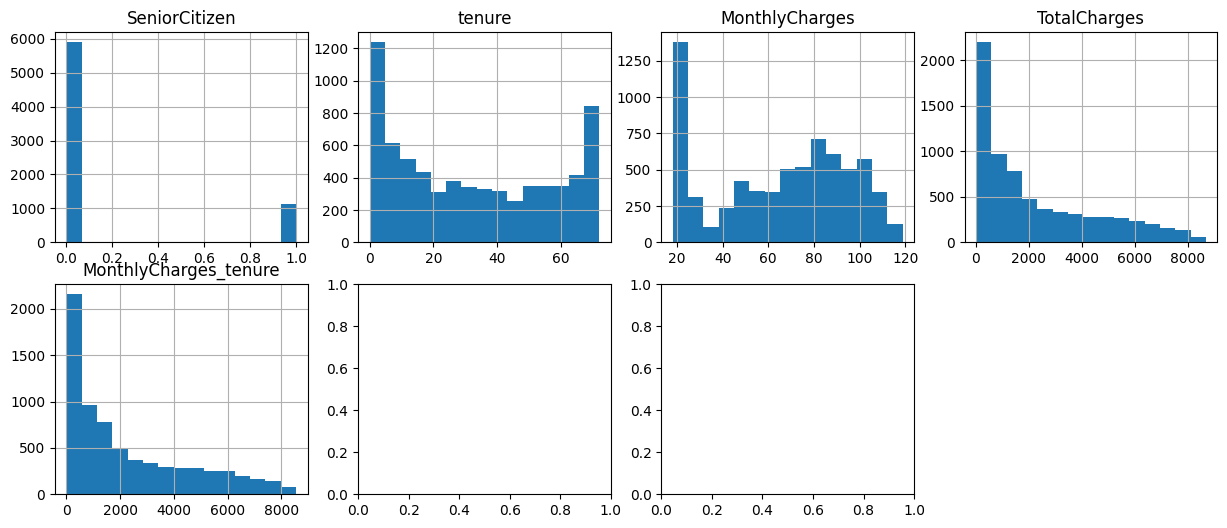

In [116]:
# we start with creating histogram of numerical values

data[num_cols].hist(bins=15, figsize=(15, 6), layout=(2, 4))
plt.tight_layout()
plt.show()

# Bivariate Analysis

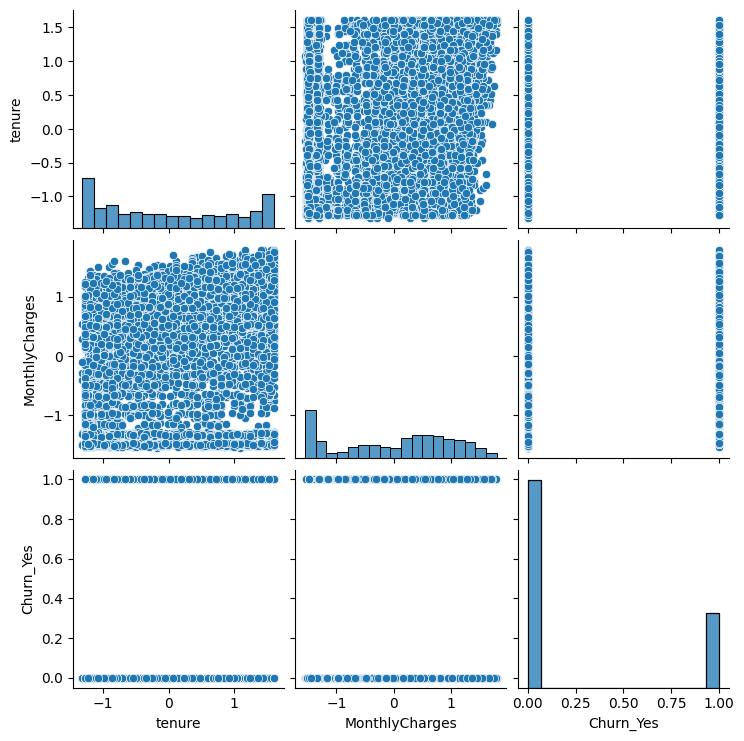

In [13]:
# Create pair plots for a subset of columns (for better visualization)
sns.pairplot(data[['tenure', 'MonthlyCharges', 'Churn_Yes']])
plt.show()

# Target Variable Analysis

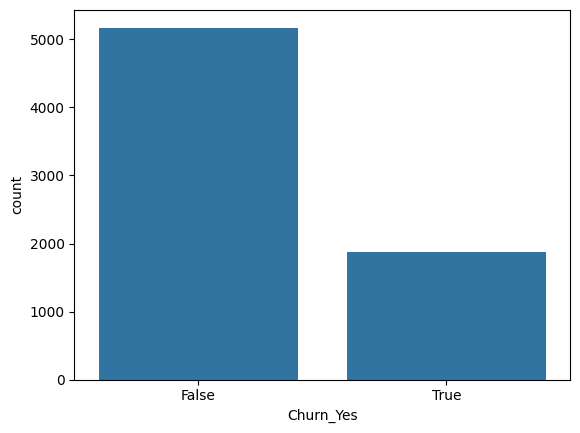

In [14]:
# Analyze the distribution of the target variable
sns.countplot(x='Churn_Yes', data=data)
plt.show()

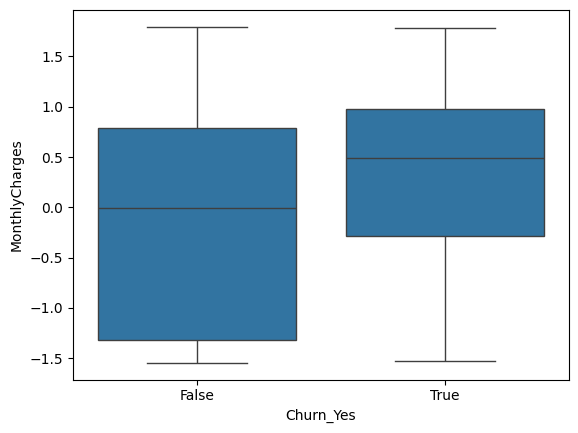

In [15]:
# Relationship between MonthlyCharges and Churn
sns.boxplot(x='Churn_Yes', y='MonthlyCharges', data=data)
plt.show()

# Day 4: Feature Engineering and Selection

- Interaction Terms:
Interaction terms capture the combined effect of two or more features.
- Example: Creating an interaction term between MonthlyCharges and tenure.

In [16]:
# Create an interaction term between MonthlyCharges and tenure
data['MonthlyCharges_tenure'] = data['MonthlyCharges'] * data['tenure']

- Aggregate Features:
Aggregate features are created by aggregating existing features.
- Example: Creating a feature that represents the average monthly charge.

In [17]:
# Create an average monthly charge feature
data['AvgMonthlyCharge'] = data['TotalCharges'] / (data['tenure'] + 1)

KeyError: 'TotalCharges'

In [27]:
print(data.columns)

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'customerID_0003-MKNFE',
       'customerID_0004-TLHLJ', 'customerID_0011-IGKFF',
       'customerID_0013-EXCHZ', 'customerID_0013-MHZWF',
       'customerID_0013-SMEOE', 'customerID_0014-BMAQU',
       ...
       'TotalCharges_996.45', 'TotalCharges_996.85', 'TotalCharges_996.95',
       'TotalCharges_997.65', 'TotalCharges_997.75', 'TotalCharges_998.1',
       'TotalCharges_999.45', 'TotalCharges_999.8', 'TotalCharges_999.9',
       'Churn_Yes'],
      dtype='object', length=13602)
